<a href="https://colab.research.google.com/github/omtayade12/SkimLit_final/blob/main/blog%20article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Unveiling the Fury of Nature: A Data-Driven Exploration of Volcanic Eruptions**

---


Introduction to Volcanology and Data Analysis
Volcanoes are one of the most awe-inspiring and fearsome natural phenomena on Earth. They are not only a window into the geothermal vigor of our planet but also a source of profound natural hazards. The study of volcanic eruptions, known as volcanology, intertwines with various scientific disciplines to understand the causes, mechanisms, and impacts of these explosive events.
In recent years, data analysis has emerged as a cornerstone in volcanology, offering unprecedented insights into eruption patterns, frequency, and intensity. By harnessing the power of data, scientists and researchers can predict future eruptions, mitigate risks, and save lives. This blog delves into a rich dataset of volcanic eruptions, applying data analysis techniques to unravel the secrets held within the fiery depths of Earth's volcanoes.

# **Overview of the Dataset**
The dataset in question is a comprehensive collection of volcanic eruption records meticulously compiled to aid in the study of these natural events. It includes a variety of data points such as the volcano number, name, eruption number, eruption category, area of activity, Volcanic Explosivity Index (VEI), and the start and end dates of each eruption. The VEI is a particularly crucial metric, as it provides a scale for the explosiveness of eruptions, ranging from gentle lava flows to cataclysmic explosions.
Understanding the nuances of this dataset is key to unlocking the stories of Earth's volcanic activity. Each variable offers a piece of the puzzle, from the geographic coordinates pinpointing the location of an eruption to the historical observations that provide context to the data.
# **Data Loading and Preparation**
To begin our journey into data analysis, we first need to load the dataset into our working environment. Google Colab, a powerful online platform for data science, allows us to do just that with ease and efficiency.

In [1]:
import pandas as pd

# Load the dataset
df_eruptions = pd.read_csv('/content/eruptions filterdata.csv')

Once loaded, we prepare the data for analysis. This involves checking for missing values, ensuring data types are correct, and possibly creating new variables that will aid in our analysis.
# **Exploratory Data Analysis (EDA)**
The heart of our data analysis lies in EDA, a process that allows us to summarize the main characteristics of the dataset, often with visual methods. A well-conducted EDA is both an art and a science, requiring a keen eye for detail and a rigorous approach to data.
# *Distribution of the Volcanic Explosivity Index (VEI)*
One of the first steps in our EDA is to examine the distribution of the VEI. This index is a measure of the relative explosiveness of volcanic eruptions, and its distribution can tell us a lot about the nature of volcanic activity.

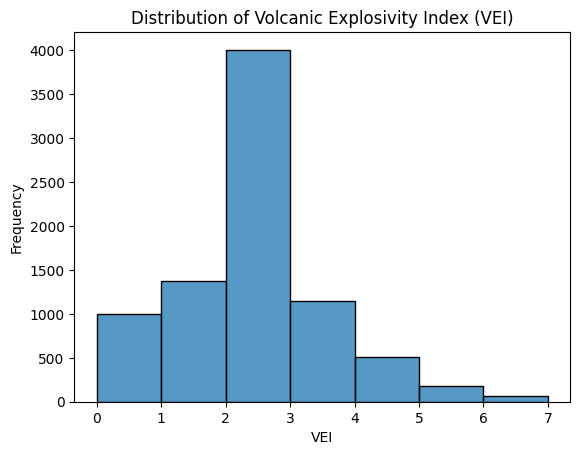

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of VEI
sns.histplot(df_eruptions['vei'].dropna(), bins=range(0, 8))
plt.title('Distribution of Volcanic Explosivity Index (VEI)')
plt.xlabel('VEI')
plt.ylabel('Frequency')
plt.show()

The histogram above reveals that most eruptions in our dataset have a VEI of 2 or 3, indicating moderate explosiveness. Eruptions with a VEI of 6 or above, which would signify colossal explosive events, are exceedingly rare.
# **Temporal Analysis of Eruption Frequencies**
Another intriguing aspect of our analysis is the temporal distribution of eruptions. By examining the frequency of eruptions over time, we can identify patterns and cycles in volcanic activity.

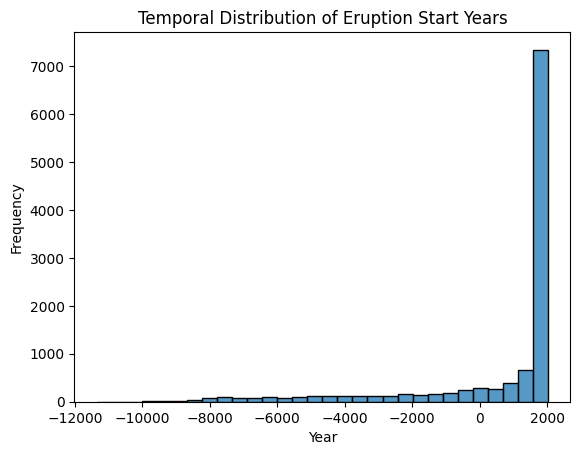

In [4]:
# Temporal distribution of eruptions
sns.histplot(df_eruptions['start_year'].dropna(), bins=30)
plt.title('Temporal Distribution of Eruption Start Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

The visualization of eruption start years might indicate periods of increased volcanic activity, which could correlate with geological or climatic events.

# **In-Depth Analysis of Volcanic Activity**
With the preliminary analysis complete, we delve deeper into the volcanic data to uncover more nuanced insights. We investigate the most active volcanoes and regions, and explore the relationship between the Volcanic Explosivity Index (VEI) and eruption duration.
# Most Active Volcanoes and Regions
To identify the most active volcanoes, we aggregate the data by volcano name and count the number of eruptions recorded for each. This analysis highlights the hotspots of volcanic activity around the world.



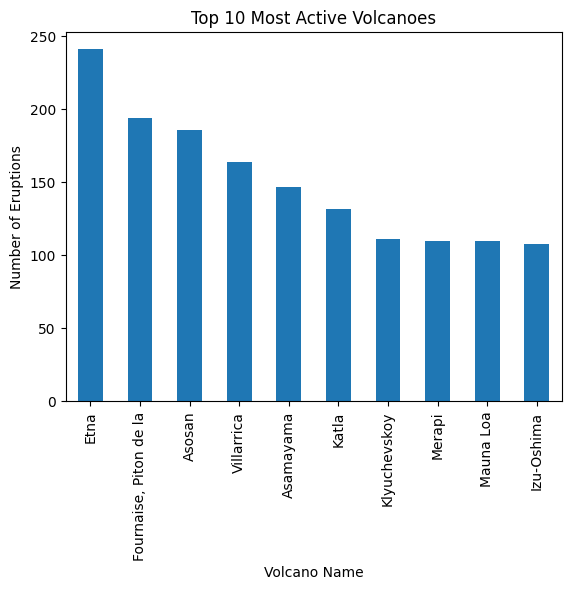

In [5]:
# Code snippet for identifying the most active volcanoes
most_active_volcanoes = df_eruptions['volcano_name'].value_counts().head(10)
most_active_volcanoes.plot(kind='bar')
plt.title('Top 10 Most Active Volcanoes')
plt.xlabel('Volcano Name')
plt.ylabel('Number of Eruptions')
plt.show()

The bar chart reveals the volcanoes that have erupted most frequently, providing a clear visual representation of volcanic activity distribution.
# Relationship Between VEI and Eruption Duration
Another compelling aspect of volcanic eruptions is the duration of each event. We examine how the explosiveness of an eruption, as measured by VEI, correlates with its duration.

In [26]:
from scipy import stats

# Identify outliers in eruption duration
z_scores = stats.zscore(df_eruptions['eruption_duration'])
abs_z_scores = np.abs(z_scores)
outlier_mask = (abs_z_scores > 3)  # typically, a z-score above 3 is considered an outlier
df_outliers = df_eruptions[outlier_mask]

# Display the outliers
print('Number of outliers:', df_outliers.shape[0])
print('Outliers head:')
print(df_outliers.head())

# Visualize the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vei', y='eruption_duration', data=df_eruptions)
plt.scatter(df_outliers['vei'], df_outliers['eruption_duration'], color='red', label='Outliers')
plt.title('VEI vs. Eruption Duration with Outliers')
plt.xlabel('Volcanic Explosivity Index (VEI)')
plt.ylabel('Eruption Duration (Days)')
plt.legend()
plt.show()

KeyError: ignored